### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

In the two conditions (congruent, incongruent):
- The independent variable: the color of the ink in which the word is printed.
- The dependent variable: reaction time to name the colors.


(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

$$H_0: \mu_{inc} - \mu_{c} \leq 0$$


$$H_1: \mu_{inc} - \mu_{c} > 0$$

Null hypothesis: population mean of incongruent reaction time is less than or equal to population mean of congruent reaction time. 
<br>
Alternative hypothesis: population mean of incongruent reaction time is greater than population mean of congruent reaction time.
<br>
- $\mu_{inc}:$ population mean of incongruent reaction time. <br>
- $\mu_{c}:$ population mean of congruent reaction time. <br>
<br>

I will use Dependent t-test for paired samples:  
- T-test: sample size < 30 & population standard deviation is unknown.
- Dependent: the same sample (participants) go through the different tasks (congruent & incongruent words condition).

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Perform the analysis here
data = pd.read_csv('stroopdata.csv')
data.Congruent.mean(), data.Incongruent.mean()

(14.051125000000004, 22.01591666666667)

In [3]:
(data.Incongruent-data.Congruent).mean()

7.964791666666667

In [4]:
data.Congruent.std(), data.Incongruent.std()

(3.559357957645195, 4.797057122469138)

In [5]:
data.Congruent.var(), data.Incongruent.var()

(12.669029070652174, 23.011757036231884)

- Measure of central tendency: 

| Condition  |  Mean |
|-----------:|:-----:|
|  Congruent | 14.05 | 
|Incongruent | 22.02 |

- Measure of variability:

| Condition  |  Variance |
|-----------:|:---------:|
|  Congruent |   12.67   | 
|Incongruent |   23.01   |

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

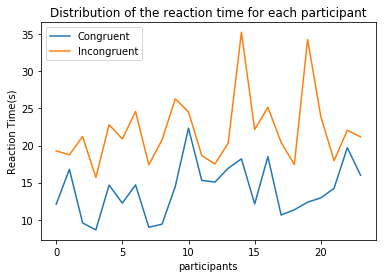

In [6]:
# Build the visualizations here
plt.plot(data.index, data.Congruent)
plt.plot(data.index, data.Incongruent)
plt.legend(['Congruent', 'Incongruent'])
plt.title('Distribution of the reaction time for each participant');
plt.xlabel('participants')
plt.ylabel('Reaction Time(s)')
plt.show()

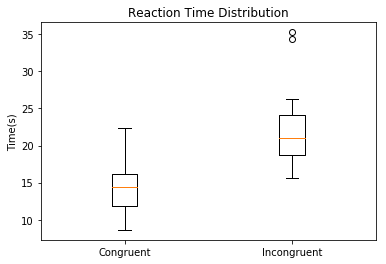

In [7]:
congruent = data['Congruent'].values.tolist()
incongruent = data['Incongruent'].values.tolist()

plt.boxplot([congruent, incongruent], labels=['Congruent', 'Incongruent']);
plt.title('Reaction Time Distribution');
plt.ylabel('Time(s)');

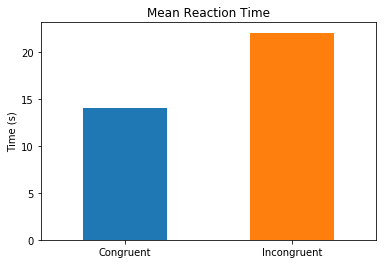

In [8]:
data.mean().plot('bar');
#plt.bar([1,2], data.mean(), tick_label=['Congruent', 'Incongruent']);
plt.xticks(rotation = 'horizontal');
plt.title('Mean Reaction Time');
plt.ylabel('Time (s)');

Based on plots
- All participants have longer reaction time in incongruent words condition.
- In average incongruent reaction time is larger than the congruent reaction time.
- Incongruent reaction time distribution has two outliers.
- Both congruent & incongruent reaction time distribution are right skewed.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [9]:
# Perform the statistical test here
t, pvalue = stats.ttest_rel(congruent,incongruent)
t, pvalue

(-8.020706944109957, 4.103000585711178e-08)

In [10]:
# measure p-value for one sided test
pvalue/2

2.051500292855589e-08

- Type l error $\alpha = 0.05$ <br>

$pval$ is so small neary zero ($pval < \alpha$)
<br>
<br>
Reject $H_0$ & accept $H_1$: participants' reaction time for incongruent words is significally greater than reaction time for congruent words. <br>
<br>
When i go through the task myself, it tooks me longer in incongruent words condition. So it was expected.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Automatic reading doesn't require focused attention, the brain simply engages in it automatically.<br>
Recognizing colors, on the other hand, may be less of an automated process. While the brain registers written meaning automatically, it does require a certain amount of attentional resources to process color, making it more difficult to process color information and therefore slowing down reaction times.
<br>
<br>
Similar task that would result in a similar effect: picture-word stimulus in which participants had to name the picture.

### Links
- [The Stroop Effect: Naming the Color but Not the Word](https://www.verywellmind.com/what-is-the-stroop-effect-2795832)
- [Comparing color-word and picture-word Stroop-like effects](https://link.springer.com/article/10.1007/BF00419659)